In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-clothing-store/products_skus.csv
/kaggle/input/ecommerce-clothing-store/products.csv
/kaggle/input/ecommerce-clothing-store/traffic.csv
/kaggle/input/ecommerce-clothing-store/orders_items.csv
/kaggle/input/ecommerce-clothing-store/orders.csv
/kaggle/input/ecommerce-clothing-store/customers.csv
/kaggle/input/ecommerce-clothing-store/transactions.csv


### 1. Business Understanding

#### This project is based on a e-commerce clothing startup. 
#### The goal is to explore customers and sales trends and behaviors to give the business some insights and strategies to boost sales. 
#### Major analyses are as follows:
* traffic & sales trend analysis
* sales funnel analysis 

### 2. Data Understanding

In [2]:
# load data
# customer => website (traffic) => product/product sku => order/order items => transaction
customers = pd.read_csv(r'/kaggle/input/ecommerce-clothing-store/customers.csv').rename(columns={'id':'customer_id', 'created_at':'customer_created_at'})
traffic = pd.read_csv(r'/kaggle/input/ecommerce-clothing-store/traffic.csv').drop(columns=['index'])
products = pd.read_csv(r'/kaggle/input/ecommerce-clothing-store/products.csv').rename(columns={'id':'product_id', 'title':'product_title', 'created_at':'product_created_at', 'published_at':'product_published_at'})
prod_sku = pd.read_csv(r'/kaggle/input/ecommerce-clothing-store/products_skus.csv').rename(columns={'id':'product_sku_id', 'created_at':'sku_created_at'})
orders = pd.read_csv(r'/kaggle/input/ecommerce-clothing-store/orders.csv').rename(columns={'id':'order_id', 'created_at':'order_created_at', 'closed_at':'order_closed_at', 'cancelled_at':'order_cancelled_at', 'processed_at': 'order_processed_at'})
ord_item = pd.read_csv(r'/kaggle/input/ecommerce-clothing-store/orders_items.csv').rename(columns={'id':'order_product_id'})
transactions = pd.read_csv(r'/kaggle/input/ecommerce-clothing-store/transactions.csv').rename(columns={'id':'transaction_id', 'created_at':'transaction_created_at', 'status':'transaction_status', 'kind':'transaction_kind', 'amount':'transaction_amount'})

col_dict = {}
col_dict['customers'] = customers.columns.tolist()
col_dict['traffic'] = traffic.columns.tolist()
col_dict['products'] = products.columns.tolist()
col_dict['prod_sku'] = prod_sku.columns.tolist()
col_dict['orders'] = orders.columns.tolist()
col_dict['ord_item'] = ord_item.columns.tolist()
col_dict['transactions'] = transactions.columns.tolist()

print('customers:', col_dict['customers'])
print('traffic:', col_dict['traffic'])
print('products:', col_dict['products'])
print('prod_sku:', col_dict['prod_sku'])
print('orders:', col_dict['orders'])
print('ord_item:', col_dict['ord_item'])
print('transactions:', col_dict['transactions'])

customers: ['customer_id', 'full_name', 'customer_created_at']
traffic: ['date_day', 'page_views', 'sessions', 'product_detail_views', 'product_checkouts', 'product_adds_to_carts', 'avg_session_in_s']
products: ['product_id', 'product_title', 'product_type', 'product_created_at', 'product_published_at']
prod_sku: ['product_sku_id', 'product_id', 'product_style', 'sku', 'sku_created_at', 'price']
orders: ['order_id', 'order_created_at', 'order_closed_at', 'order_cancelled_at', 'customer_id', 'financial_status', 'fulfillment_status', 'order_processed_at', 'total_price', 'shipping_rate', 'subtotal_price', 'total_discounts', 'total_line_items_price']
ord_item: ['order_product_id', 'order_id', 'product_id', 'product_style', 'variant_id', 'sku', 'product_title', 'fulfillment_status', 'price', 'quantity']
transactions: ['order_id', 'transaction_id', 'parent_id', 'transaction_amount', 'error_code', 'transaction_kind', 'transaction_status', 'transaction_created_at']


#### No. Customers:

In [3]:
print("There are {} customers, {} don't have full names.".format(customers['customer_id'].nunique(), customers['full_name'].isnull().sum()))
print("{} are unique full names and {} are duplicates.".format(customers['full_name'].nunique(), customers['customer_id'].nunique() - customers['full_name'].nunique()))

There are 44661 customers, 10962 don't have full names.
28638 are unique full names and 16023 are duplicates.


#### Traffic (Pageviews):

Avg. daily # pageviews = 18542
Medium. daily # pageviews = 10417
# outliers = 9 [625003, 220707, 226285, 137956, 169100, 187239, 192006, 136682, 160544]


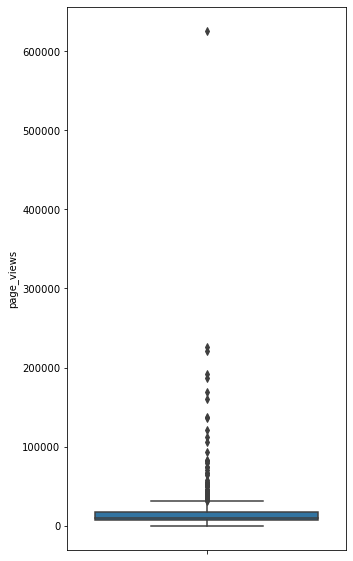

In [4]:
plt.figure(figsize=(5,10))
sns.boxplot(data=traffic, y='page_views')
print('Avg. daily # pageviews = {:.0f}'.format(traffic['page_views'].mean()))
print('Medium. daily # pageviews = {:.0f}'.format(traffic['page_views'].median()))
print('# outliers = {} {}'.format(traffic.loc[np.abs(stats.zscore(traffic['page_views'])) > 3, 'page_views'].count(), traffic.loc[np.abs(stats.zscore(traffic['page_views'])) > 3, 'page_views'].tolist()))

* #### No. Product Detail Pageviews:

Avg. daily # product detail pageviews = 4957
Median daily # product detail pageviews = 2670
# outliers = 8 [175257, 58940, 65644, 34996, 60816, 60005, 57313, 40927]


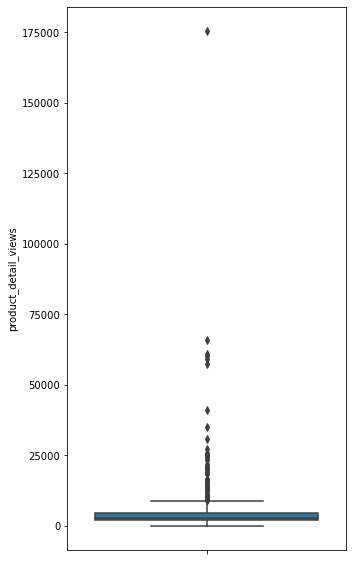

In [5]:
plt.figure(figsize=(5,10))
sns.boxplot(data=traffic, y='product_detail_views')
print('Avg. daily # product detail pageviews = {:.0f}'.format(traffic['product_detail_views'].mean()))
print('Median daily # product detail pageviews = {:.0f}'.format(traffic['product_detail_views'].median()))
print('# outliers = {} {}'.format(traffic.loc[np.abs(stats.zscore(traffic['product_detail_views'])) > 3, 'product_detail_views'].count(), traffic.loc[np.abs(stats.zscore(traffic['product_detail_views'])) > 3, 'product_detail_views'].tolist()))

#### No. Add2Carts:

Avg. daily # add-to-carts = 499
Median daily # add-to-carts = 262
# outliers = 9 [10851, 4763, 4301, 5700, 9450, 3408, 8299, 3273, 4434]


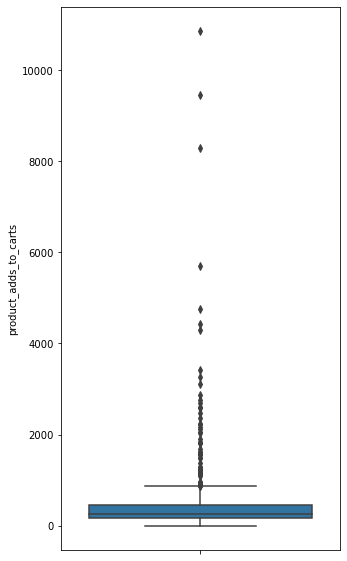

In [6]:
plt.figure(figsize=(5,10))
sns.boxplot(data=traffic, y='product_adds_to_carts')
print('Avg. daily # add-to-carts = {:.0f}'.format(traffic['product_adds_to_carts'].mean()))
print('Median daily # add-to-carts = {:.0f}'.format(traffic['product_adds_to_carts'].median()))
print('# outliers = {} {}'.format(traffic.loc[np.abs(stats.zscore(traffic['product_adds_to_carts'])) > 3, 'product_adds_to_carts'].count(), traffic.loc[np.abs(stats.zscore(traffic['product_adds_to_carts'])) > 3, 'product_adds_to_carts'].tolist()))

#### No. Checkouts:

Avg. daily # checkouts = 146
Median daily # checkouts = 62
# outliers = 9 [5639, 2001, 1644, 1228, 1840, 1312, 1852, 1794, 1378]


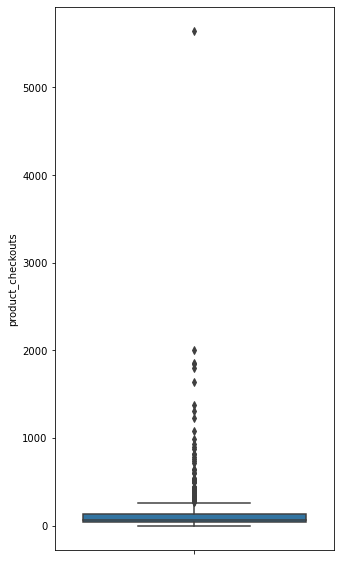

In [7]:
plt.figure(figsize=(5,10))
sns.boxplot(data=traffic, y='product_checkouts')
print('Avg. daily # checkouts = {:.0f}'.format(traffic['product_checkouts'].mean()))
print('Median daily # checkouts = {:.0f}'.format(traffic['product_checkouts'].median()))
print('# outliers = {} {}'.format(traffic.loc[np.abs(stats.zscore(traffic['product_checkouts'])) > 3, 'product_checkouts'].count(), traffic.loc[np.abs(stats.zscore(traffic['product_checkouts'])) > 3, 'product_checkouts'].tolist()))

#### Sessions:

Avg. daily # sessions = 4461
Median daily # sessions = 2693
# outliers = 9 [146860, 61654, 46927, 31815, 31239, 32166, 36614, 45385, 35921]


Avg. of daily average session in seconds = 145.32655160450236
Median. of daily average session in seconds = 132.607292539816
# outliers = 4 [2374.16666666667, 1632.11111111111, 1891.25, 1557.95652173913]


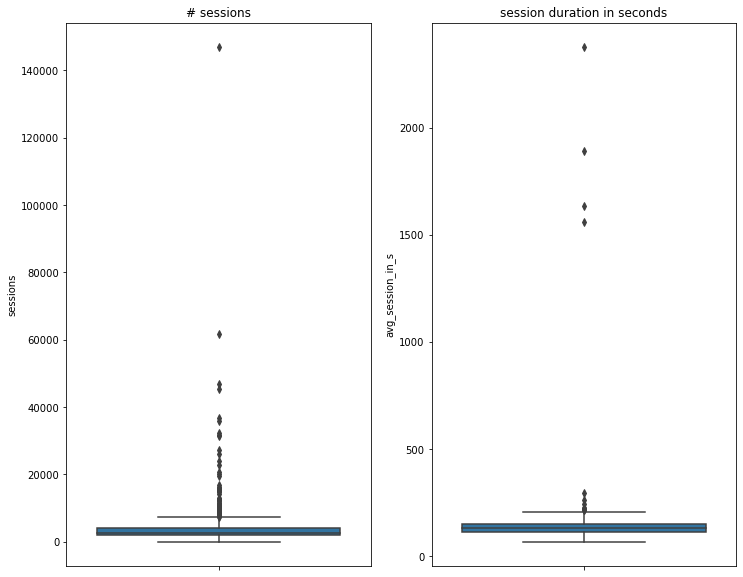

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
sns.boxplot(data=traffic, y='sessions', ax=ax1)
ax1.set_title('# sessions')
sns.boxplot(data=traffic, y='avg_session_in_s', ax=ax2)
ax2.set_title('session duration in seconds')
print('Avg. daily # sessions = {:.0f}'.format(traffic['sessions'].mean()))
print('Median daily # sessions = {:.0f}'.format(traffic['sessions'].median()))
print('# outliers = {} {}'.format(traffic.loc[np.abs(stats.zscore(traffic['sessions'])) > 3, 'sessions'].count(), traffic.loc[np.abs(stats.zscore(traffic['sessions'])) > 3, 'sessions'].tolist()))
print('\n')
print('Avg. of daily average session in seconds = {}'.format(traffic['avg_session_in_s'].mean()))
print('Median. of daily average session in seconds = {}'.format(traffic['avg_session_in_s'].median()))
print('# outliers = {} {}'.format(traffic.loc[np.abs(stats.zscore(traffic['avg_session_in_s'])) > 3, 'avg_session_in_s'].count(), traffic.loc[np.abs(stats.zscore(traffic['avg_session_in_s'])) > 3, 'avg_session_in_s'].tolist()))

#### Products:

There are 247 products and 28 product types.
* Hooide==hoodie, Tousers==Trousers, and mixed-cases to be improved...


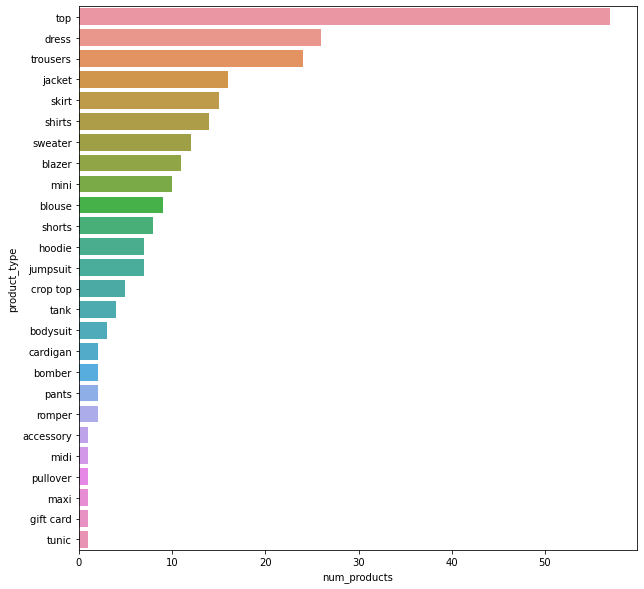

In [9]:
print('There are {} products and {} product types.'.format(products['product_id'].nunique(), products['product_type'].nunique()))
print('* Hooide==hoodie, Tousers==Trousers, and mixed-cases to be improved...')

products['product_type'] = products['product_type'].str.lower()
products.loc[lambda x: x['product_type'] == 'tousers', 'product_type'] = 'trousers'
products.loc[lambda x: x['product_type'] == 'hooide', 'product_type'] = 'hoodie'
plt.figure(figsize=(10, 10))
sns.barplot(data=products.groupby(['product_type'])['product_id'].count().reset_index().rename(columns={'product_id':'num_products'}).sort_values(by=['num_products'], ascending=False), 
            x='num_products',
            y='product_type');

#### Product SKU (Stock Keeping Unit):

In [10]:
print('There are {} SKUs, which means some products have multiple SKUs.'.format(prod_sku['sku'].nunique()))

There are 1353 SKUs, which means some products have multiple SKUs.


There are 5 outliers: [['gift card', 300.0], [nan, 150.0], [nan, 150.0], [nan, 150.0], [nan, 150.0]]


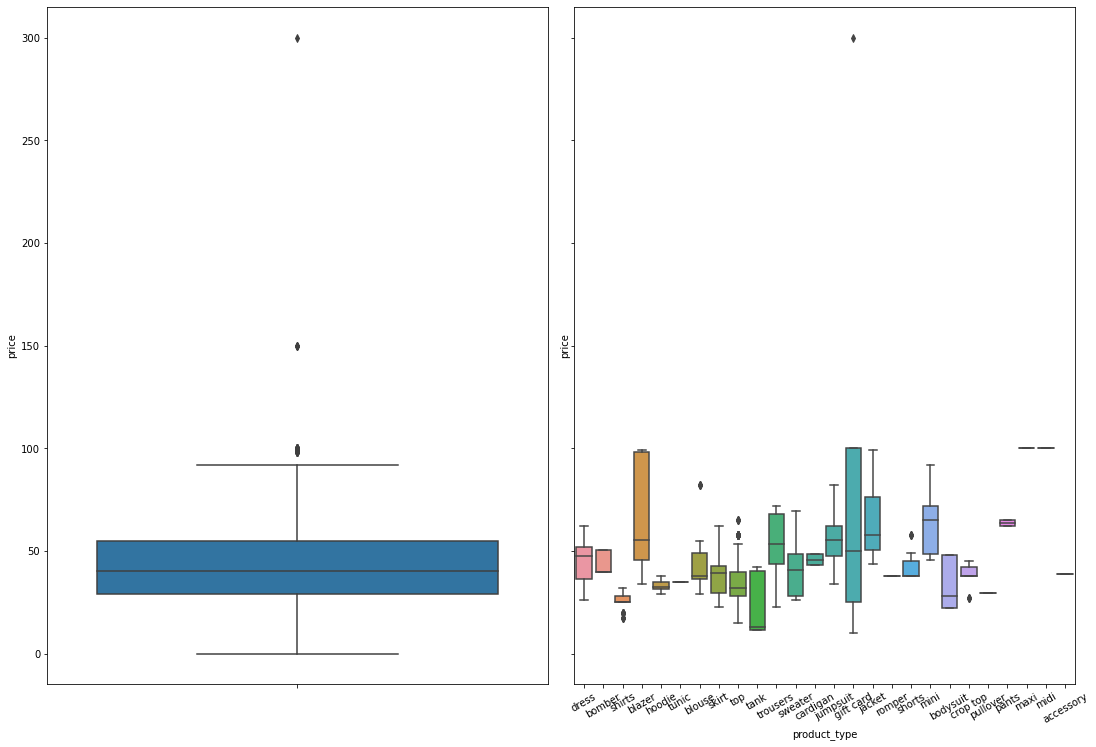

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
fig.tight_layout()
sns.boxplot(data=prod_sku, y='price', ax=ax1)
sns.boxplot(data=pd.merge(products, prod_sku, on='product_id'), y='price', x='product_type', ax=ax2)
ax2.set_xticklabels(labels=ax2.get_xticklabels(), rotation=30);
print('There are {} outliers: {}'.format(prod_sku.loc[np.abs(stats.zscore(prod_sku['price'])) > 3].shape[0], pd.merge(products, prod_sku, on='product_id').loc[lambda x: np.abs(stats.zscore(x['price'])) > 3, ['product_type', 'price']].values.tolist()))

#### Orders:

In [12]:
print('There are {} orders.'.format(orders['order_id'].nunique()))

There are 21358 orders.


In [13]:
print(orders[['order_created_at', 'order_processed_at', 'order_closed_at', 'order_cancelled_at']].notnull().drop_duplicates().reset_index(drop=True), '\n')
print("Order creation & process date doesn't have NaNs, and theoretically order close date should be later than order cancel date.")
print('* There are {} record having close date before cancel date.'.format(orders.loc[lambda x: x['order_closed_at'] < x['order_cancelled_at']].shape[0]))

   order_created_at  order_processed_at  order_closed_at  order_cancelled_at
0              True                True             True                True
1              True                True             True               False
2              True                True            False                True
3              True                True            False               False 

Order creation & process date doesn't have NaNs, and theoretically order close date should be later than order cancel date.
* There are 1 record having close date before cancel date.


In [14]:
print("When orders haven't been closed yet, most of them are not fulfilled or only partially fulfilled: \n{}".format(orders.loc[lambda x: x['order_closed_at'].isnull()]['fulfillment_status'].value_counts(dropna=False).to_dict()))
print("Once they are fulfilled, the financial status are: \n{}".format(orders.loc[lambda x: x['order_closed_at'].isnull() & (x['fulfillment_status'] == 'fulfilled')]['financial_status'].value_counts(dropna=False).to_dict()))

When orders haven't been closed yet, most of them are not fulfilled or only partially fulfilled: 
{nan: 658, 'partial': 308, 'fulfilled': 195, 'restocked': 2}
Once they are fulfilled, the financial status are: 
{'partially_refunded': 180, 'refunded': 15}


#### Fulfillment Status:

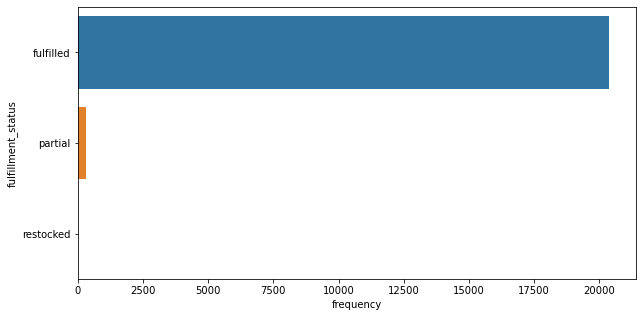

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(data=orders['fulfillment_status'].value_counts(dropna=True).reset_index().rename(columns={'index':'fulfillment_status', 'fulfillment_status':'frequency'}), x='frequency', y='fulfillment_status');

#### Financial Status:

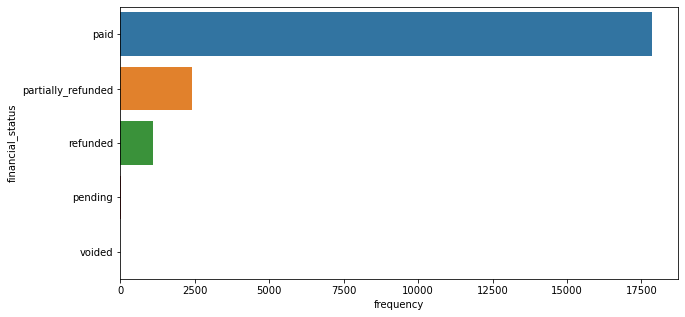

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data=orders['financial_status'].value_counts(dropna=True).reset_index().rename(columns={'index':'financial_status', 'financial_status':'frequency'}), x='frequency', y='financial_status');

#### Order Size:

Some stats for # items/order: 
count    21355.000000
mean         1.735659
std          1.712648
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        127.000000
Name: quantity, dtype: float64


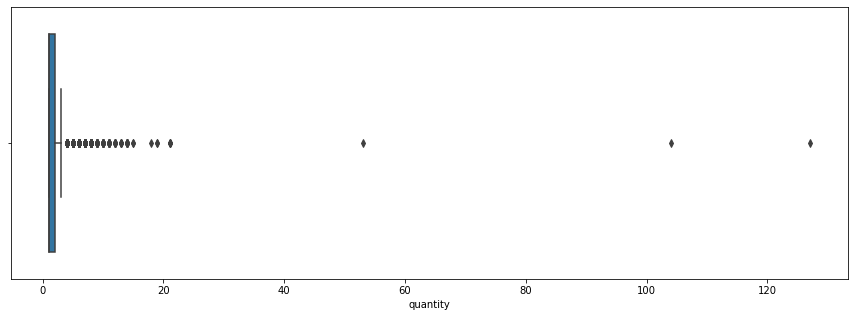

In [17]:
plt.figure(figsize=(15, 5))
print('Some stats for # items/order: \n{}'.format(pd.merge(products, ord_item, on='product_id').groupby(['order_id'])['quantity'].sum().reset_index()['quantity'].describe()))
sns.boxplot(data=pd.merge(products, ord_item, on='product_id').groupby(['order_id'])['quantity'].sum().reset_index(), x='quantity');

In [18]:
print('For those orders having at least 2 items:')
order_over_2 = (pd.merge(products, ord_item, on='product_id').groupby(['order_id'])['quantity'].sum().reset_index().loc[lambda x: x['quantity'] >= 2]['order_id'])
product_bundle = pd.merge(products, ord_item, on='product_id')
product_bundle = pd.pivot_table(product_bundle.loc[lambda x: x['order_id'].isin(order_over_2)],
               index='order_id',
               columns=['product_type'],
               values=['quantity'],
               aggfunc='sum',
               fill_value=0).reset_index()
product_bundle.columns[1]
product_bundle.columns = [product_bundle.columns[0][0]] + [product_bundle.columns[i][1] for i in range(1, len(product_bundle.columns))]
product_bundle = product_bundle.set_index('order_id')

product_bundle['item_freq'] = product_bundle.apply(lambda x: {col:x[col] for col in product_bundle.columns if x[col] > 0}, axis=1)
product_bundle.head()


For those orders having at least 2 items:


,accessory,blazer,blouse,bodysuit,bomber,cardigan,crop top,dress,gift card,hoodie,...,romper,shirts,shorts,skirt,sweater,tank,top,trousers,tunic,item_freq
order_id,,,,,,,,,,,,,,,,,,,,,
7676331935,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"{'bomber': 1, 'tunic': 1}"
7676363167,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,"{'shirts': 1, 'trousers': 1}"
7676539359,0,0,0,0,0,0,0,0,0,1,...,0,3,0,0,0,0,0,0,0,"{'hoodie': 1, 'shirts': 3}"
7676549855,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"{'blouse': 1, 'shirts': 1}"
7676564127,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,"{'hoodie': 1, 'tunic': 1}"


#### Order Price:

The order price follows this order: total_line_items_price ==> total_discounts ==> subtotal_price ==> shipping_rate ==> total_price
* (+) means add-on price, (-) means deduct price.


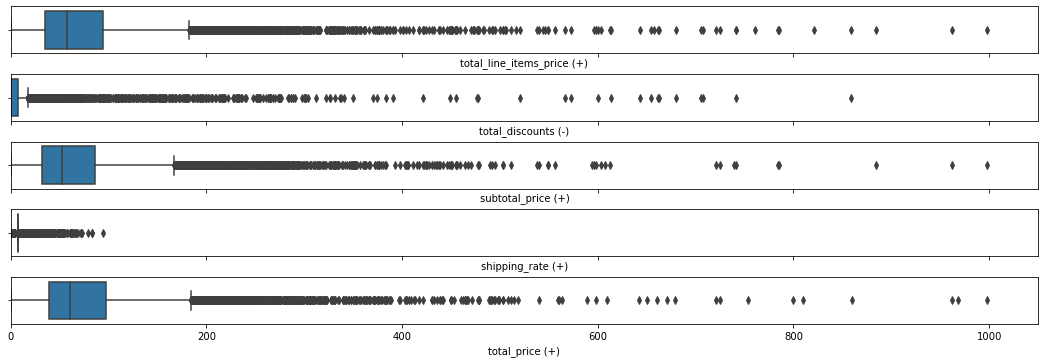

In [19]:
temp = orders[['total_line_items_price', 'total_discounts', 'subtotal_price', 'shipping_rate', 'total_price']]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15, 5))
fig.tight_layout()
sns.boxplot(data=temp, x='total_line_items_price', ax=ax1)
sns.boxplot(data=temp, x='total_discounts', ax=ax2)
sns.boxplot(data=temp, x='subtotal_price', ax=ax3)
sns.boxplot(data=temp, x='shipping_rate', ax=ax4)
sns.boxplot(data=temp, x='total_price', ax=ax5);

ax1.set_xlabel('total_line_items_price (+)')
ax2.set_xlabel('total_discounts (-)')
ax3.set_xlabel('subtotal_price (+)')
ax4.set_xlabel('shipping_rate (+)')
ax5.set_xlabel('total_price (+)')

plt.xlim((0, 1050));
print('The order price follows this order: {}'.format(' ==> '.join(temp.columns.tolist())))
print('* (+) means add-on price, (-) means deduct price.')

#### Item Price:

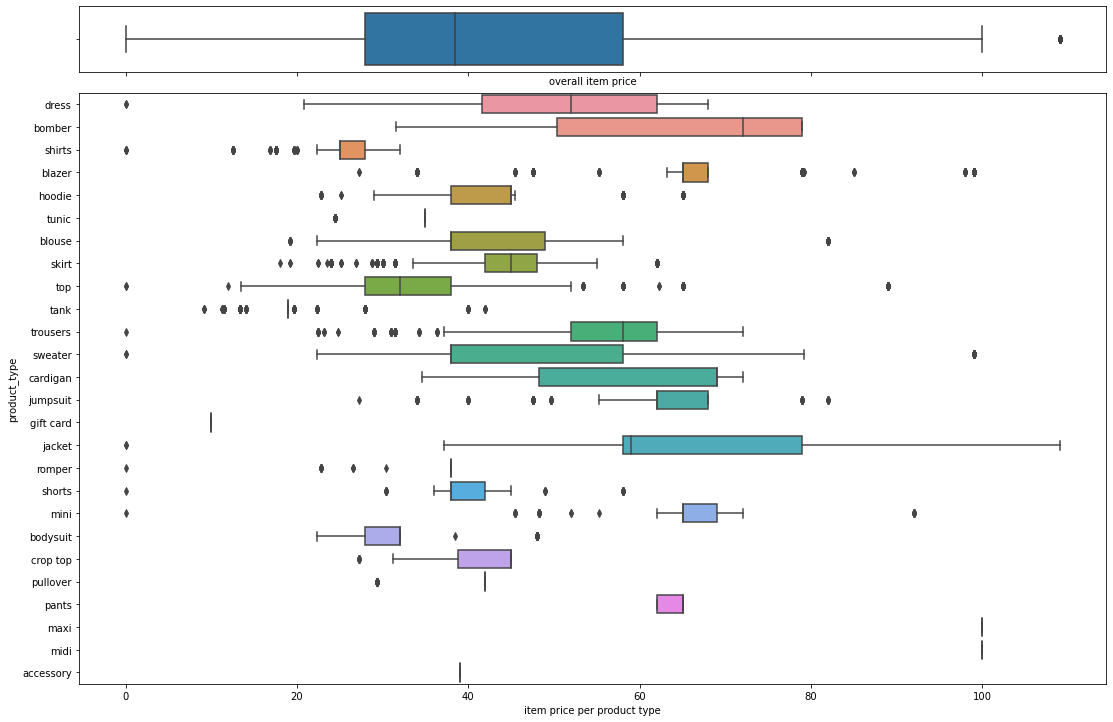

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 10), gridspec_kw={'height_ratios': [1, 9]})
fig.tight_layout()
sns.boxplot(data=ord_item, x='price', ax=ax1)
ax1.set_xlabel('overall item price')
sns.boxplot(data=pd.merge(products, ord_item, on='product_id'), x='price', y='product_type', ax=ax2)
ax2.set_xlabel('item price per product type');

#### Transactions:

In [21]:
temp = pd.merge(orders, transactions, on='order_id')[['total_price', 'transaction_amount', 'transaction_kind', 'transaction_status']]
print('Order total price == transaction price? There are {} not equal.'.format(temp.loc[lambda x: x['total_price'] != x['transaction_amount']].shape[0]))
temp.loc[lambda x: x['total_price'] != x['transaction_amount']]['transaction_kind'].value_counts()

Order total price == transaction price? There are 3306 not equal.


refund           2831
sale              452
authorization      12
capture             7
void                4
Name: transaction_kind, dtype: int64

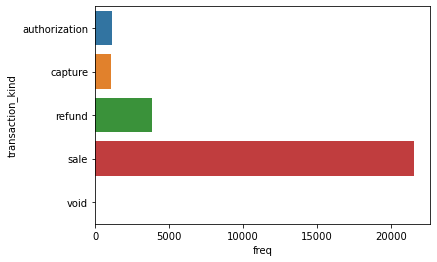

In [22]:
sns.barplot(data=temp.groupby(['transaction_kind'])['transaction_amount'].count().reset_index().rename(columns={'transaction_amount':'freq'}), y='transaction_kind', x='freq');

### Sales Trend & Seasonality

* Sales trend by daily traffic

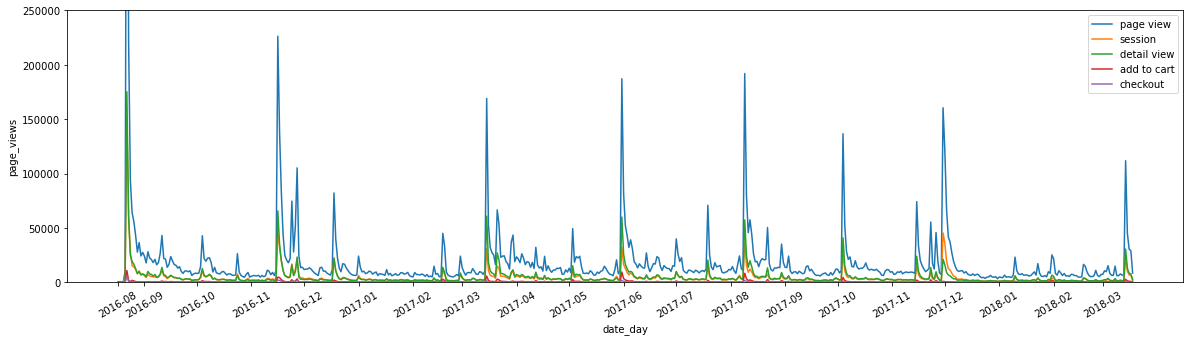

In [23]:
sales_trend_by_traffic = traffic.copy()
sales_trend_by_traffic['y_m'] = sales_trend_by_traffic['date_day'].apply(lambda x: x[:7])
fig, ax = plt.subplots(figsize=(20, 5))
plt.ylim((0, 250000))
# pageview - time
sns.lineplot(data=sales_trend_by_traffic.sort_values(by=['date_day']), x='date_day', y='page_views', ax=ax, label='page view')
# sessions - time
sns.lineplot(data=sales_trend_by_traffic.sort_values(by=['date_day']), x='date_day', y='sessions', ax=ax, label='session')
# prduct detail view - time
sns.lineplot(data=sales_trend_by_traffic.sort_values(by=['date_day']), x='date_day', y='product_detail_views', ax=ax, label='detail view')
# product add to cart - time
sns.lineplot(data=sales_trend_by_traffic.sort_values(by=['date_day']), x='date_day', y='product_adds_to_carts', ax=ax, label='add to cart')
# product checkouts - time
sns.lineplot(data=sales_trend_by_traffic.sort_values(by=['date_day']), x='date_day', y='product_checkouts', ax=ax, label='checkout')

plt.xticks(ticks=sales_trend_by_traffic.reset_index().groupby(['y_m'])['index'].first().tolist(), labels=sales_trend_by_traffic.reset_index().groupby(['y_m'])['index'].first().index.tolist(), rotation=30);

* Sales trend by daily sold items

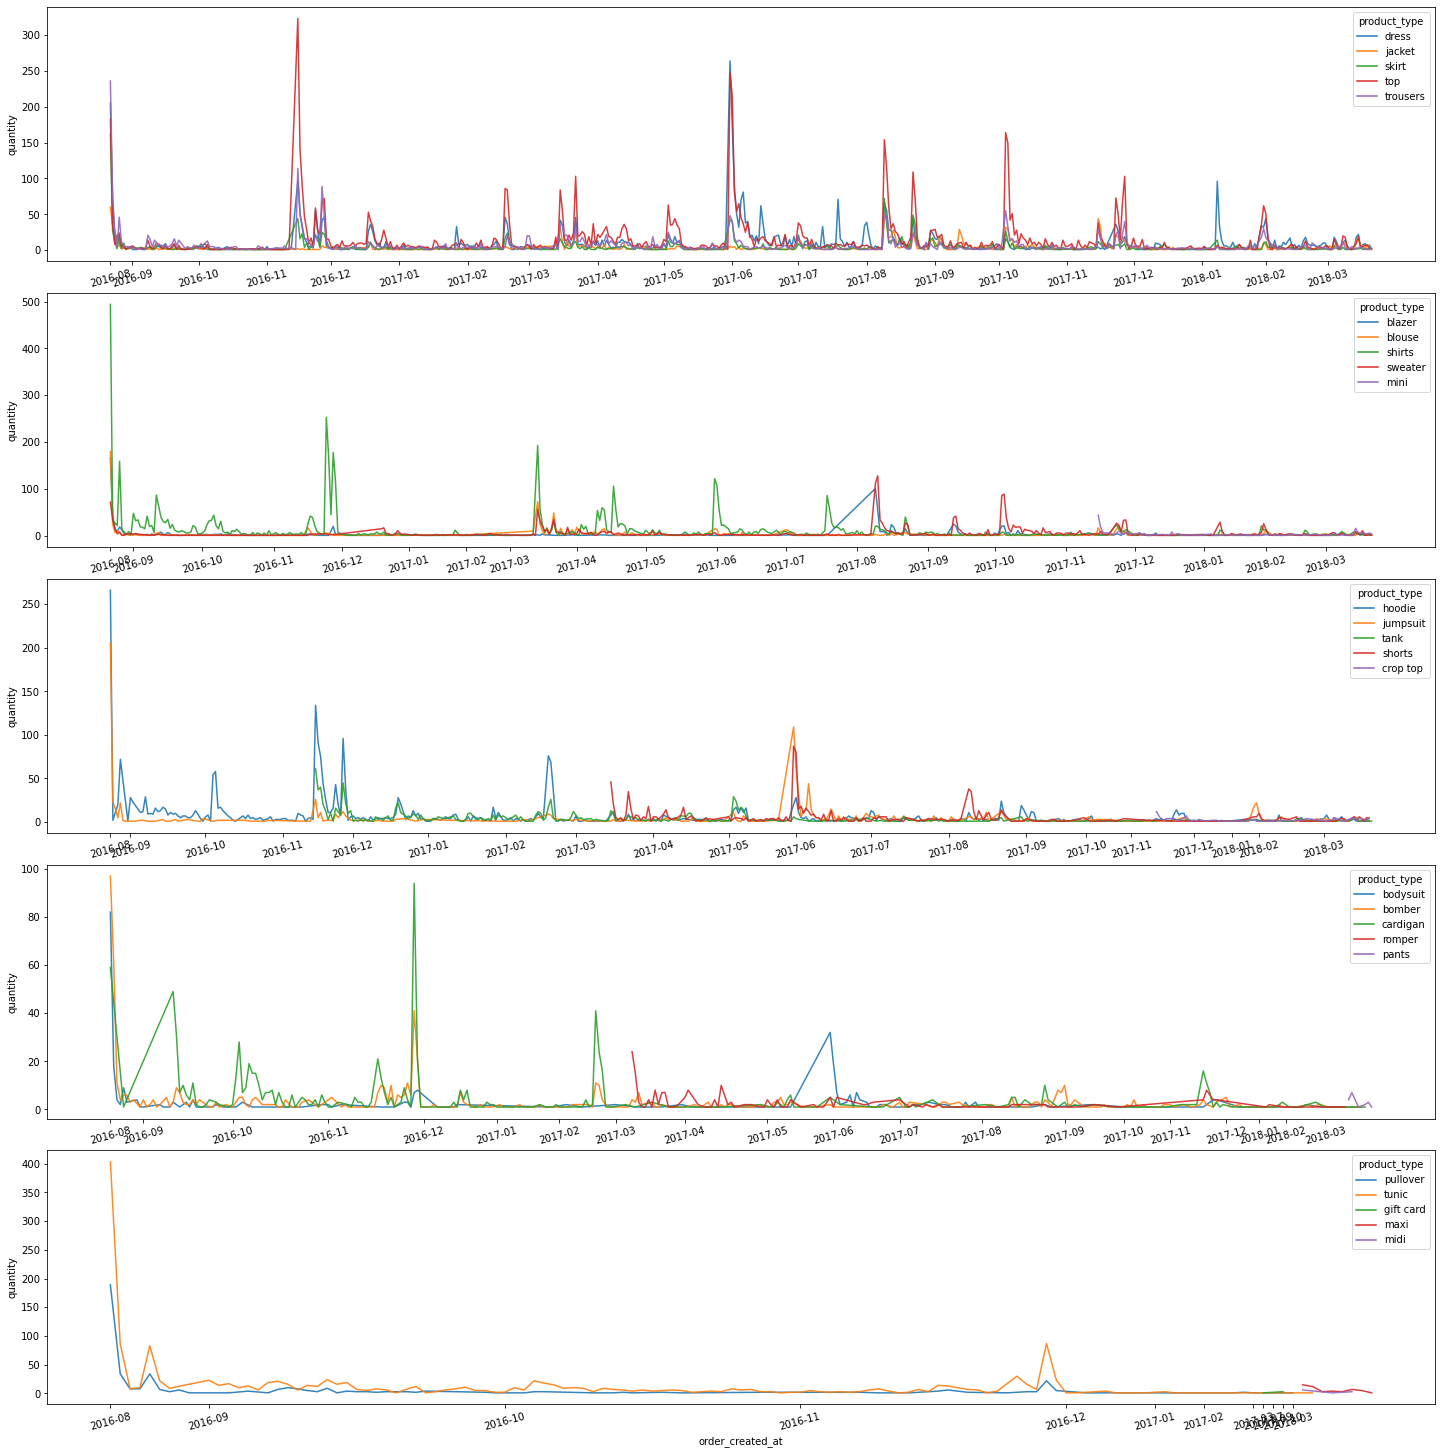

In [24]:
sales_trend_by_item = (pd.merge(orders.loc[lambda x: x['fulfillment_status'] == 'fulfilled'], 
                                transactions.loc[lambda x: x['transaction_status'] == 'success'], 
                                on='order_id')
                       .merge(ord_item, on='order_id')
                       .merge(products, on='product_id')
                       .groupby(['order_created_at', 'product_type'])[['quantity']].sum()
                       .reset_index())
sales_trend_by_item['y_m'] = sales_trend_by_item['order_created_at'].apply(lambda x: x[:7])

# now we split the product types into 5 tiers based on popularity
t1 = ['top', 'dress', 'trousers', 'jacket', 'skirt'] 
t2 = ['shirts', 'sweater', 'blazer', 'mini', 'blouse']
t3 = ['shorts', 'hoodie', 'jumpsuit', 'crop top', 'tank'] 
t4 = ['bodysuit', 'cardigan', 'bomber', 'pants', 'romper']
t5 = ['accessory', 'midi', 'pullover', 'maxi', 'gift card', 'tunic']
      
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))
fig.tight_layout()
sns.lineplot(data=sales_trend_by_item.loc[lambda x: x['product_type'].isin(t1)], x='order_created_at', y='quantity', hue='product_type', ax=ax1, alpha=0.9)
sns.lineplot(data=sales_trend_by_item.loc[lambda x: x['product_type'].isin(t2)], x='order_created_at', y='quantity', hue='product_type', ax=ax2, alpha=0.9)
sns.lineplot(data=sales_trend_by_item.loc[lambda x: x['product_type'].isin(t3)], x='order_created_at', y='quantity', hue='product_type', ax=ax3, alpha=0.9)
sns.lineplot(data=sales_trend_by_item.loc[lambda x: x['product_type'].isin(t4)], x='order_created_at', y='quantity', hue='product_type', ax=ax4, alpha=0.9)
sns.lineplot(data=sales_trend_by_item.loc[lambda x: x['product_type'].isin(t5)], x='order_created_at', y='quantity', hue='product_type', ax=ax5, alpha=0.9);

def adjust_xticks(data, t, ax, rotation=15):
    xticks = data.loc[lambda x: x['product_type'].isin(t)][['order_created_at', 'y_m']].drop_duplicates().reset_index(drop=True).reset_index().groupby(['y_m'])['index'].first().tolist()
    xticklabels = data.loc[lambda x: x['product_type'].isin(t)]['y_m'].unique().tolist()
    data = data.reset_index().loc[lambda x: x['product_type'].isin(t)]
    ax.set_xticks(ticks=xticks)
    ax.set_xticklabels(labels=xticklabels, 
                       rotation=rotation)

adjust_xticks(sales_trend_by_item, t1, ax1)
adjust_xticks(sales_trend_by_item, t2, ax2)
adjust_xticks(sales_trend_by_item, t3, ax3)
adjust_xticks(sales_trend_by_item, t4, ax4)
adjust_xticks(sales_trend_by_item, t5, ax5)

* Sales trend by daily order

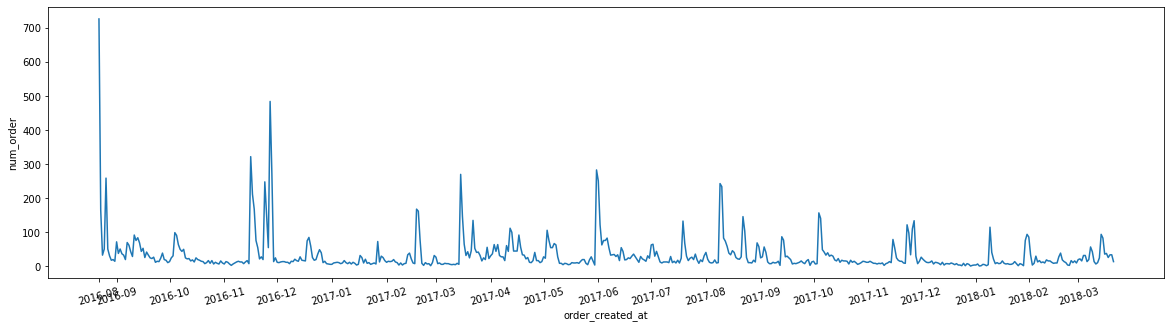

In [25]:
# here again, to make sure each order is closed and have brought revenue, we also make sure the it is not a fully refunded order.
sales_trend_by_order = (pd.merge(transactions, orders, on='order_id')
                        .loc[lambda x: 
                             (x['fulfillment_status'] == 'fulfilled') & 
                             (x['transaction_status'] == 'success') & 
                             (x['financial_status'] != 'refunded')]
                        .groupby(['order_created_at'])['order_id'].nunique()
                        .reset_index()
                        .rename(columns={'order_id':'num_order'}))

sales_trend_by_order['y_m'] = sales_trend_by_order['order_created_at'].apply(lambda x: x[:7])

plt.figure(figsize=(20, 5))
sns.lineplot(data=sales_trend_by_order, x='order_created_at', y='num_order');
plt.xticks(ticks=sales_trend_by_order.reset_index().groupby(['y_m'])['index'].first().tolist(),
           labels=sales_trend_by_order['y_m'].unique().tolist(),
           rotation=15);


* Traffic-order correlation 

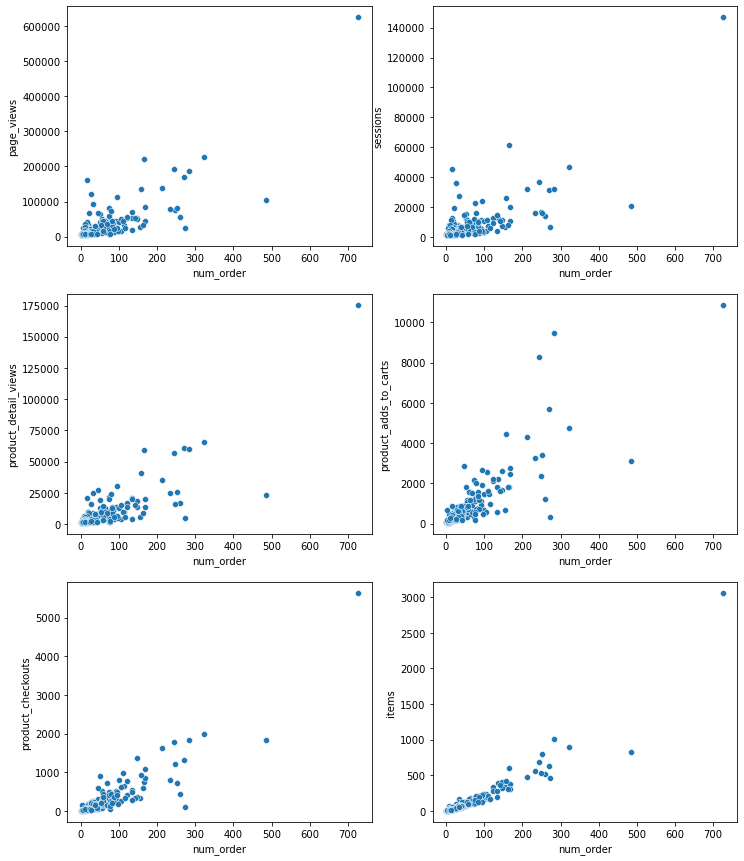

In [26]:
cor_traf_order = (traffic
                  .merge(sales_trend_by_order, 
                         left_on='date_day',
                         right_on='order_created_at')
                  .sort_values(by=['date_day']))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
sns.scatterplot(data=cor_traf_order, y='page_views', x='num_order', ax=ax1)
sns.scatterplot(data=cor_traf_order, y='sessions', x='num_order', ax=ax2)
sns.scatterplot(data=cor_traf_order, y='product_detail_views', x='num_order', ax=ax3)
sns.scatterplot(data=cor_traf_order, y='product_adds_to_carts', x='num_order', ax=ax4)
sns.scatterplot(data=cor_traf_order, y='product_checkouts', x='num_order', ax=ax5);

cor_traf_item = (sales_trend_by_order
                 .merge(sales_trend_by_item
                        .groupby(['order_created_at'])['quantity'].sum()
                        .reset_index(),
                        on='order_created_at')
                 .sort_values(by=['order_created_at'])
                 .rename(columns={'quantity':'items'}))

sns.scatterplot(data=cor_traf_item, y='items', x='num_order', ax=ax6);

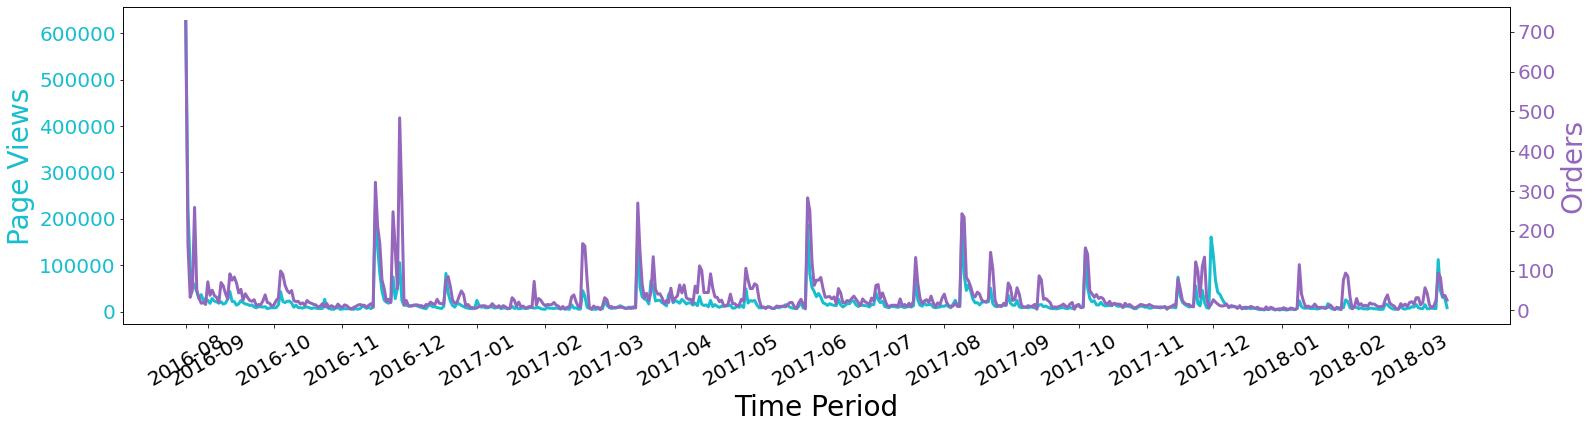

In [27]:
fig, ax1 = plt.subplots(figsize=(20,5))
fig.tight_layout()
#fig.suptitle('The relation between page views and orders', fontsize=40)
color = 'tab:cyan'
ax1.set_xlabel('Time Period', fontsize=28)
ax1.set_ylabel('Page Views', color=color, fontsize=28)
sns.lineplot(data=cor_traf_order, x='order_created_at', y='page_views', color=color, linewidth=3, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
xticks = cor_traf_order.reset_index().groupby(['y_m'])['index'].first().tolist()
xlabels = cor_traf_order['y_m'].unique().tolist()
ax1.set_xticks(ticks=xticks)
ax1.set_xticklabels(labels=xlabels, rotation=30)

plt.xticks(size=20)
plt.yticks(size=20)

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Orders', color=color, fontsize=28)
sns.lineplot(data=cor_traf_order, x='order_created_at', y='num_order', color=color, linewidth=3, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(ticks=xticks)
ax2.set_xticklabels(labels=xlabels, rotation=30)
plt.yticks(size=20)

plt.show()

### Sales Funnel

* Overall Conversion Rates

In [28]:
print('The conversion rate of placed order to page view is only 0.19%.')
print('Through the sales funnel, there is only 10.08% conversion from detail view to add-to-cart, which is relatively the lowest.')
# conversion table
col_order = ['page_views', 'product_detail_views', 'product_adds_to_carts', 'product_checkouts']
overall_conversion = traffic[col_order].sum().reset_index().rename(columns={'index':'sales_funnel', 0:'traffic'}).loc[lambda x: ~x['sales_funnel'].isin(['sessions', 'avg_session_in_s'])]
# orders
overall_orders= orders[['order_id']].count().reset_index().rename(columns={'index':'sales_funnel', 0:'traffic'})
overall_orders.loc[0, 'sales_funnel'] = 'placed_orders'
# closed orders
overall_closed_orders = (orders
                         .loc[lambda x: 
                              (x['order_id'].isin(transactions.loc[lambda x: x['transaction_status'] == 'success', 'order_id'].tolist())) &
                              (x['fulfillment_status'] == 'fulfilled')][['order_id']].count()
                         .reset_index()
                         .rename(columns={'index':'sales_funnel', 0:'traffic'}))
overall_closed_orders.loc[0, 'sales_funnel'] = 'closed_orders'
# profit orders
overall_profit_orders = (orders
                         .loc[lambda x: 
                              (x['order_id'].isin(transactions.loc[lambda x: x['transaction_status'] == 'success', 'order_id'].tolist())) &
                              (x['fulfillment_status'] == 'fulfilled') & 
                              (x['financial_status'] != 'refunded')][['order_id']].count()
                         .reset_index()
                         .rename(columns={'index':'sales_funnel', 0:'traffic'}))
overall_profit_orders.loc[0, 'sales_funnel'] = 'profit_orders'

overall_conversion = pd.concat([overall_conversion, overall_orders, overall_closed_orders, overall_profit_orders], axis=0)
overall_conversion['prev_lvl_traffic'] = overall_conversion['traffic'].shift(1)
overall_conversion['conversion_rate'] = np.round(overall_conversion['traffic'] / overall_conversion['prev_lvl_traffic'], 5)
overall_conversion['conversion_rate_on_pageview'] = np.round(overall_conversion['traffic'] / overall_conversion.loc[lambda x: x['sales_funnel'] == 'page_views', 'traffic'].values, 5)
overall_conversion

The conversion rate of placed order to page view is only 0.19%.
Through the sales funnel, there is only 10.08% conversion from detail view to add-to-cart, which is relatively the lowest.


,sales_funnel,traffic,prev_lvl_traffic,conversion_rate,conversion_rate_on_pageview
0,page_views,10735976,NaN,NaN,1.00000
1,product_detail_views,2870342,10735976.0,0.26736,0.26736
2,product_adds_to_carts,289193,2870342.0,0.10075,0.02694
3,product_checkouts,84464,289193.0,0.29207,0.00787
0,placed_orders,21358,84464.0,0.25287,0.00199
0,closed_orders,19712,21358.0,0.92293,0.00184
0,profit_orders,19127,19712.0,0.97032,0.00178


### Product Analysis

* Product trend correlations (date level)

Total No. product types = 26


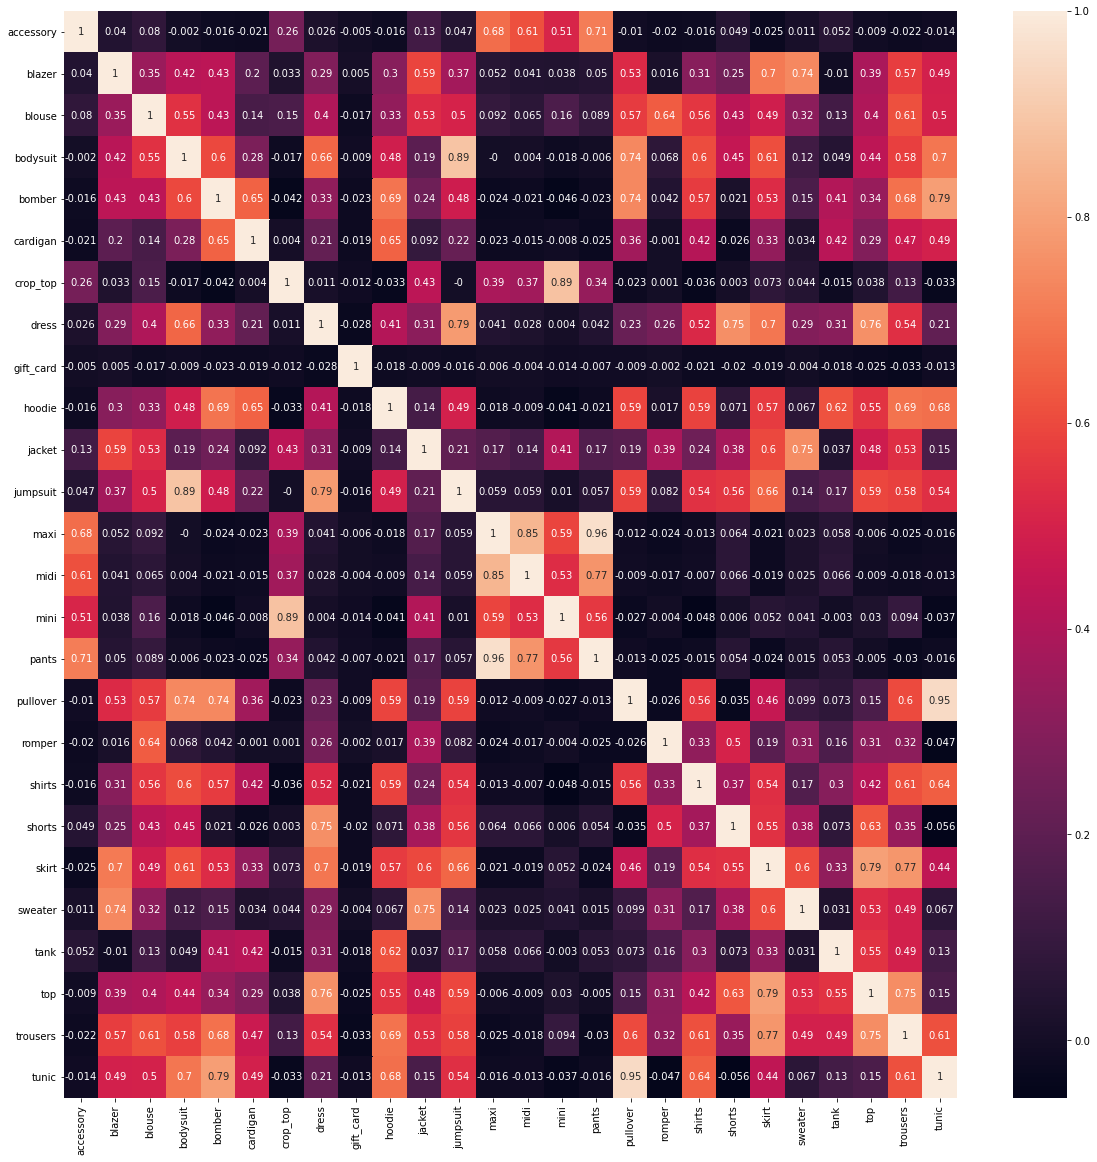

In [29]:
prod_order = (pd.merge(ord_item[['order_id', 'product_id', 'price', 'quantity']],
                       products[['product_id', 'product_type', 'product_created_at','product_published_at']],
                       on='product_id')
              .merge(orders[['order_id', 'order_created_at', 'order_closed_at', 'order_cancelled_at', 'total_price', 'shipping_rate', 'subtotal_price', 'total_discounts', 'total_line_items_price']], 
                     on='order_id')
              .sort_values(by=['order_id', 'product_id']))

print('Total No. product types =', prod_order['product_type'].nunique())
prod_by_t = pd.pivot_table(prod_order,
               index='order_created_at',
               columns='product_type',
               values='quantity',
               aggfunc=lambda x: sum(x),
               fill_value=0).reset_index().sort_values(by=['order_created_at'])
prod_by_t.columns = [col.lower().replace(' ', '_') for col in prod_by_t.columns]

plt.figure(figsize=(20, 20))
sns.heatmap(np.round(prod_by_t.drop(columns=['order_created_at']).corr(), 3), annot=True);

* Product bundling & combo-2 (correlation between product types)(order level)

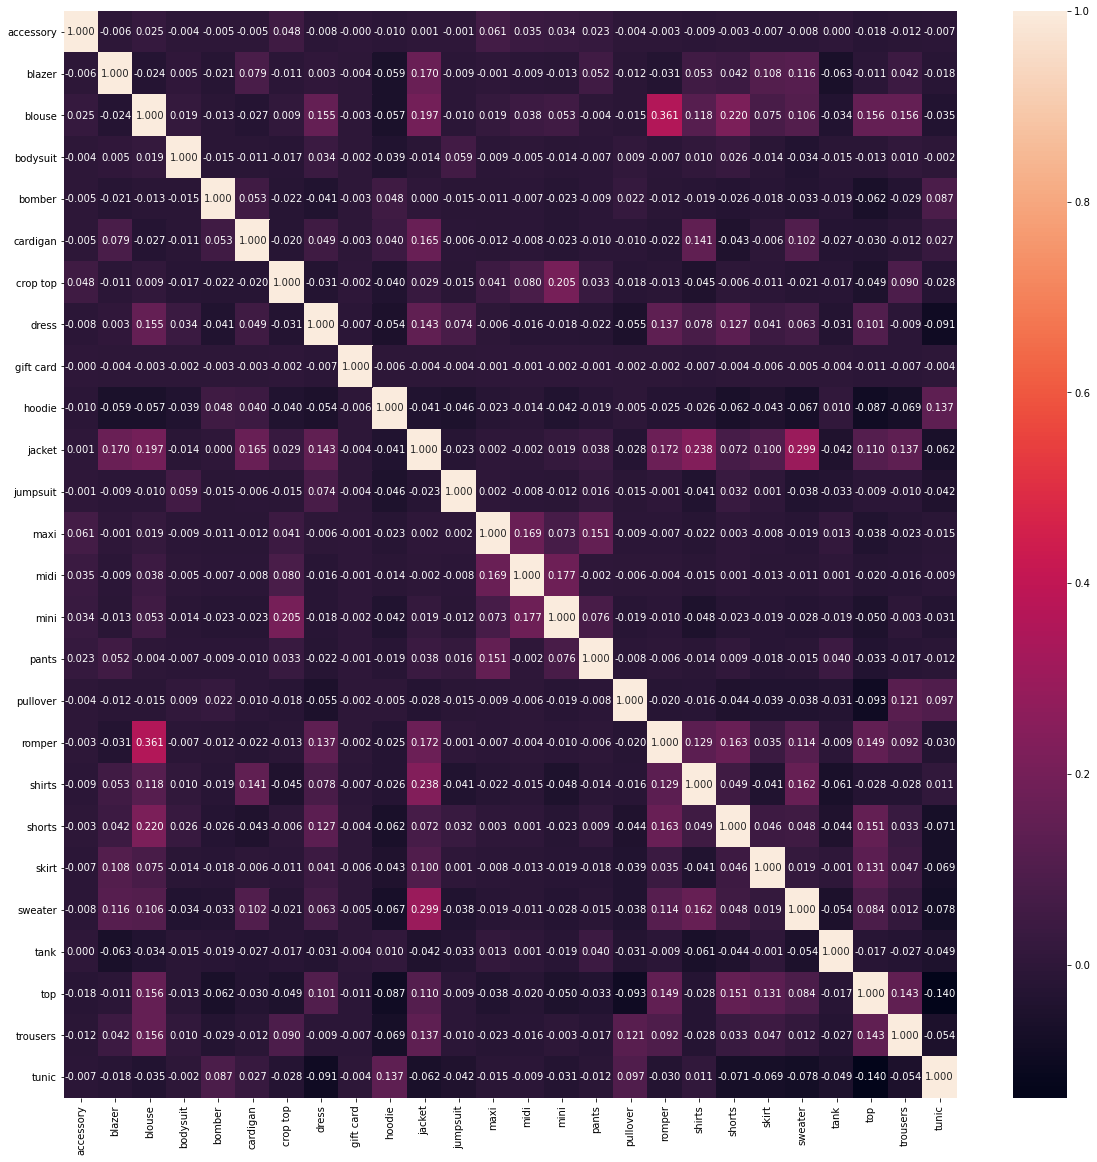

In [30]:
plt.figure(figsize=(20, 20))
sns.heatmap(product_bundle.drop(columns=['item_freq']).corr(), annot=True, annot_kws={'fontsize':10}, fmt='0.3f');

* Market Basket Analysis a.k.a Affinity Analysis (correlation between two products)

In [31]:
concurrence = (pd.merge(ord_item.loc[lambda x: x['fulfillment_status'] == 'fulfilled'], 
                        ord_item.loc[lambda x: x['fulfillment_status'] == 'fulfilled'], 
                        on='order_id')
               .loc[lambda x: x['product_id_x'] != x['product_id_y']]
               .groupby(['product_id_x', 'product_id_y'])['order_id'].count()
               .reset_index()
               .rename(columns={'order_id':'num_concurrence', 
                                'product_id_x':'product_x', 
                                'product_id_y':'product_y'}))

concurrence.head()

,product_x,product_y,num_concurrence
0,1.292763e+10,1.292763e+10,95
1,1.292763e+10,1.292763e+10,17
2,1.292763e+10,1.292763e+10,26
3,1.292763e+10,1.292763e+10,75
4,1.292763e+10,1.292763e+10,9


In [32]:
order_by_product = (ord_item
                    .groupby(['product_id'])['order_id'].count()
                    .reset_index()
                    .rename(columns={'order_id':'num_order'}))
order_by_product.head()

,product_id,num_order
0,1.292763e+10,962
1,1.292763e+10,1112
2,1.292763e+10,144
3,1.292763e+10,462
4,1.292763e+10,1122


In [33]:
basket = pd.merge(concurrence, 
                  order_by_product.rename(columns={'product_id':'product_x'}), 
                  on='product_x')
basket['percentage_purchase_together'] = np.round(basket['num_concurrence'] / basket['num_order'], 4)
basket.sort_values(by=['percentage_purchase_together'], ascending=False).head(10)

,product_x,product_y,num_concurrence,num_order,percentage_purchase_together
14720,1.183022e+12,1.183022e+12,2,2,1.0000
14717,1.183022e+12,1.183022e+12,2,2,1.0000
5969,5.212641e+11,5.212640e+11,287,332,0.8645
14770,1.183022e+12,1.183022e+12,5,6,0.8333
14452,1.007444e+12,1.007444e+12,21,29,0.7241
10204,8.501820e+11,8.501820e+11,49,72,0.6806
11002,8.501824e+11,8.501824e+11,42,68,0.6176
14592,1.183022e+12,1.183022e+12,6,10,0.6000
11862,8.501832e+11,8.501832e+11,15,26,0.5769
5436,5.212638e+11,5.212644e+11,110,192,0.5729


### Promotion Analysis

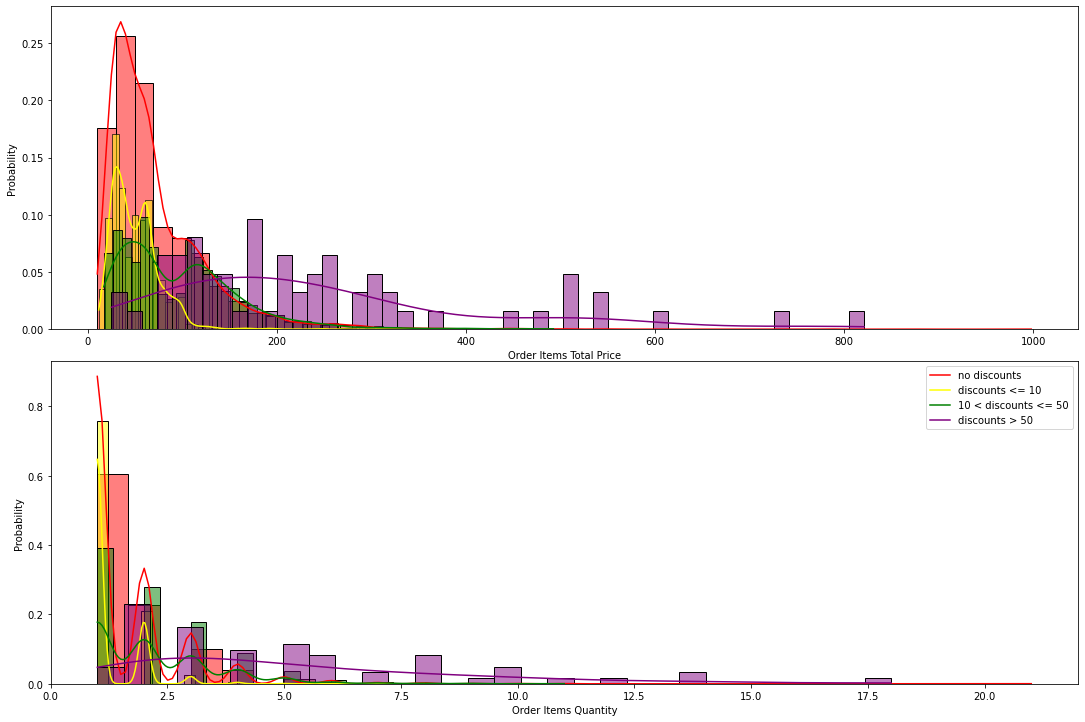

In [34]:
target_order_ids = np.intersect1d(orders.loc[lambda x: 
                                             (x['financial_status'] != 'refunded') & 
                                             (x['fulfillment_status'] == 'fulfilled'), 'order_id'].tolist(), 
                                  transactions.loc[lambda x: x['transaction_status'] == 'success', 'order_id'].tolist()) 

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
fig.tight_layout()
sns.histplot(orders.loc[lambda x: x['order_id'].isin(target_order_ids)].loc[lambda x: x['total_discounts'] == 0]['total_line_items_price'], ax=ax1, bins=50, stat='probability', color='red', label='no discounts', kde=True);
sns.histplot(orders.loc[lambda x: x['order_id'].isin(target_order_ids)].loc[lambda x: (x['total_discounts'] > 0) & (x['total_discounts'] <= 10)]['total_line_items_price'], ax=ax1, bins=50, stat='probability', color='yellow', label='discounts <= 10', kde=True);
sns.histplot(orders.loc[lambda x: x['order_id'].isin(target_order_ids)].loc[lambda x: (x['total_discounts'] > 10) & (x['total_discounts'] <= 50)]['total_line_items_price'], ax=ax1, bins=50, stat='probability', color='green', label='10 < discounts <= 50', kde=True);
sns.histplot(orders.loc[lambda x: x['order_id'].isin(target_order_ids)].loc[lambda x: x['total_discounts'] > 50]['total_line_items_price'], ax=ax1, bins=50, stat='probability', color='purple', label='discounts > 50', kde=True);
plt.legend(['no discounts', 'discounts <= 10', '10 < discounts <= 50', 'discounts > 50'])
ax1.set_xlabel('Order Items Total Price')

sns.histplot(prod_order.loc[lambda x: x['order_id'].isin(target_order_ids)].loc[lambda x: x['total_discounts'] == 0].groupby(['order_id'])['quantity'].sum(), ax=ax2, bins=30, stat='probability', color='red', label='no discounts', kde=True);
sns.histplot(prod_order.loc[lambda x: x['order_id'].isin(target_order_ids)].loc[lambda x: (x['total_discounts'] > 0) & (x['total_discounts'] <= 10)].groupby(['order_id'])['quantity'].sum(), ax=ax2, bins=30, stat='probability', color='yellow', label='discounts <= 10', kde=True);
sns.histplot(prod_order.loc[lambda x: x['order_id'].isin(target_order_ids)].loc[lambda x: (x['total_discounts'] > 10) & (x['total_discounts'] <= 50)].groupby(['order_id'])['quantity'].sum(), ax=ax2, bins=30, stat='probability', color='green', label='10 < discounts <= 50', kde=True);
sns.histplot(prod_order.loc[lambda x: x['order_id'].isin(target_order_ids)].loc[lambda x: x['total_discounts'] > 50].groupby(['order_id'])['quantity'].sum(), ax=ax2, bins=30, stat='probability', color='purple', label='discounts > 50', kde=True);
plt.legend(['no discounts', 'discounts <= 10', '10 < discounts <= 50', 'discounts > 50'])
ax2.set_xlabel('Order Items Quantity');

### Customer Analysis

* Overall Churn  

In [35]:
orders['y_m'] = orders['order_created_at'].apply(lambda x: x[:7])
overall_churn = orders.groupby(['y_m'])['customer_id'].nunique().reset_index().rename(columns={'customer_id':'current_month_num_customers'}) # consider a customer may place orders at the same day, nunique() is used
overall_churn['previous_month_num_customers'] = overall_churn['current_month_num_customers'].shift(1)
#overall_churn['current_month_1st_day_num_customers'] = pd.Series(orders.groupby(['y_m', 'order_created_at'])['customer_id'].nunique().reset_index().groupby(['y_m'])['customer_id'].first().tolist())
#overall_churn['current_month_last_day_num_customers'] = pd.Series(orders.groupby(['y_m', 'order_created_at'])['customer_id'].nunique().reset_index().groupby(['y_m'])['customer_id'].last().tolist())

overall_churn['num_churns'] = overall_churn['previous_month_num_customers'] - overall_churn['current_month_num_customers']
overall_churn['churn_rate'] = overall_churn['num_churns'] / overall_churn['previous_month_num_customers']
overall_churn

,y_m,current_month_num_customers,previous_month_num_customers,num_churns,churn_rate
0,2016-08,1433,NaN,NaN,NaN
1,2016-09,1214,1433.0,219.0,0.152826
2,2016-10,823,1214.0,391.0,0.322076
3,2016-11,2353,823.0,-1530.0,-1.859052
4,2016-12,748,2353.0,1605.0,0.682108
5,2017-01,488,748.0,260.0,0.347594
6,2017-02,759,488.0,-271.0,-0.555328
7,2017-03,1251,759.0,-492.0,-0.648221
8,2017-04,1237,1251.0,14.0,0.011191
9,2017-05,1060,1237.0,177.0,0.143088


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


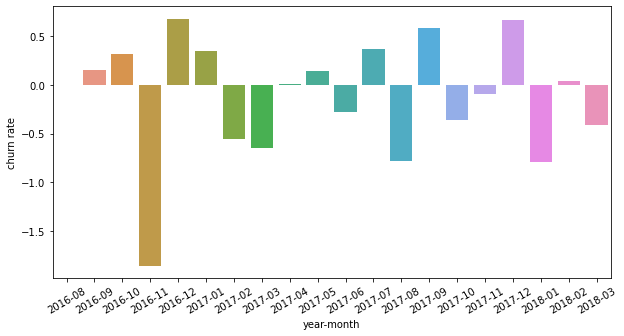

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(overall_churn['y_m'], overall_churn['churn_rate'])
#plt.title('Churn rate over month', size=20)
ax.tick_params(axis='x', rotation=30)
plt.ylabel('churn rate')
plt.xlabel('year-month');

* Customer-level Churn

In [37]:
customer_journey = []
for cus in customers['customer_id'].unique():
    cus_1st_day = customers.loc[lambda x: x['customer_id'] == cus, 'customer_created_at'].values[0]
    for t in orders.loc[lambda x: x['order_created_at'] >= cus_1st_day]['order_created_at'].unique():
        customer_journey.append([cus, t])
        
customer_journey = pd.DataFrame(customer_journey, columns=['customer_id', 'date'])
customer_journey = pd.merge(customers[['customer_id', 'customer_created_at']], customer_journey, on='customer_id')

customer_order = (pd.merge(customer_journey, 
                           orders, 
                           left_on=['customer_id', 'date'],
                           right_on=['customer_id', 'order_created_at'], 
                           how='left')
                  [['customer_id', 'customer_created_at', 'date', 'order_created_at']]
                  .sort_values(by=['order_created_at', 'customer_id']))

customer_order['y_m'] = customer_order['date'].apply(lambda x: x[:7] if type(x) == str else x)
customer_order

,customer_id,customer_created_at,date,order_created_at,y_m
4599662,8683754719,2016-08-21,2016-08-21,2016-08-21,2016-08
4600241,8686224991,2016-08-22,2016-08-22,2016-08-22,2016-08
4600242,8686224991,2016-08-22,2016-08-22,2016-08-22,2016-08
1732,8686915935,2016-08-22,2016-08-22,2016-08-22,2016-08
4601976,8686924319,2016-08-22,2016-08-22,2016-08-22,2016-08
...,...,...,...,...,...
17336275,1063374165501,2018-03-21,2018-03-21,NaN,2018-03
17336276,1063374165501,2018-03-21,2018-03-22,NaN,2018-03
17336278,1063472010749,2018-03-21,2018-03-22,NaN,2018-03
17336280,1063480464893,2018-03-21,2018-03-22,NaN,2018-03


In [38]:
customer_order['is_purchased'] = customer_order['order_created_at'].apply(lambda x: 1 if type(x) == str else 0)
customer_churn = customer_order.groupby(['customer_id', 'y_m']).agg({'customer_created_at':'first', 'is_purchased':'sum'}).rename(columns={'is_purchased':'num_order'}).reset_index()
customer_churn['prev_num_order'] = customer_churn.groupby(['customer_id']).apply(lambda x: x['num_order'].shift(1)).tolist()
customer_churn['2nd_prev_num_order'] = customer_churn.groupby(['customer_id']).apply(lambda x: x['num_order'].shift(2)).tolist()
customer_churn['3rd_prev_num_order'] = customer_churn.groupby(['customer_id']).apply(lambda x: x['num_order'].shift(3)).tolist()

customer_churn['is_current_month_active'] = customer_churn['num_order'].apply(lambda x: 1 if x > 0 else 0)
customer_churn['is_prev_month_active'] = customer_churn['prev_num_order'].apply(lambda x: 1 if x > 0 else 0)
customer_churn['is_2nd_prev_month_active'] = customer_churn['2nd_prev_num_order'].apply(lambda x: 1 if x > 0 else 0)
customer_churn['is_3rd_prev_month_active'] = customer_churn['3rd_prev_num_order'].apply(lambda x: 1 if x > 0 else 0)

In [39]:
customer_churn = customer_churn.drop(columns=['status'], errors='ignore')
customer_churn['total_num_order'] = pd.Series(customer_churn.groupby(['customer_id'])['num_order'].cumsum().tolist())

customer_churn.loc[lambda x: 
                   (x['is_current_month_active'] == 0) & 
                   (x['is_prev_month_active'] == 0) & 
                   (x['is_2nd_prev_month_active'] == 0) & 
                   (x['is_3rd_prev_month_active'] == 0), 'status'] = 'churn'

customer_churn.loc[lambda x: 
                   (x['is_current_month_active'] == 1) | 
                   (x['is_prev_month_active'] == 1) |
                   (x['is_2nd_prev_month_active'] == 1) |
                   (x['is_3rd_prev_month_active'] == 1), 'status'] = 'active'

customer_churn.loc[lambda x: 
                   (x['is_current_month_active'] == 1) & 
                   (x['is_prev_month_active'] == 1) &
                   (x['is_2nd_prev_month_active'] == 1) &
                   (x['is_3rd_prev_month_active'] == 1), 'status'] = 'loyal'

customer_churn.loc[lambda x: x['total_num_order'] == 0, 'status'] = 'have_not_purchased'

customer_churn.head()

,customer_id,y_m,customer_created_at,num_order,prev_num_order,2nd_prev_num_order,3rd_prev_num_order,is_current_month_active,is_prev_month_active,is_2nd_prev_month_active,is_3rd_prev_month_active,total_num_order,status
0,8644299295,2016-08,2016-08-16,0,NaN,NaN,NaN,0,0,0,0,0,have_not_purchased
1,8644299295,2016-09,2016-08-16,0,0.0,NaN,NaN,0,0,0,0,0,have_not_purchased
2,8644299295,2016-10,2016-08-16,0,0.0,0.0,NaN,0,0,0,0,0,have_not_purchased
3,8644299295,2016-11,2016-08-16,0,0.0,0.0,0.0,0,0,0,0,0,have_not_purchased
4,8644299295,2016-12,2016-08-16,0,0.0,0.0,0.0,0,0,0,0,0,have_not_purchased


In [40]:
churn = pd.pivot_table(customer_churn[['y_m', 'status']],
                       index=['y_m'],
                       columns=['status'],
                       aggfunc=lambda x: len(x),
                       fill_value=0).reset_index()
churn

status,y_m,active,churn,have_not_purchased,loyal
0,2016-08,1433,0,8784,0
1,2016-09,2524,0,10681,0
2,2016-10,3260,0,12523,0
3,2016-11,5274,0,14655,4
4,2016-12,4749,1121,15567,1
5,2017-01,4062,2097,16069,1
6,2017-02,3896,2700,16488,6
7,2017-03,2990,4585,18003,5
8,2017-04,3431,5092,19042,5
9,2017-05,3888,5355,20047,7


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


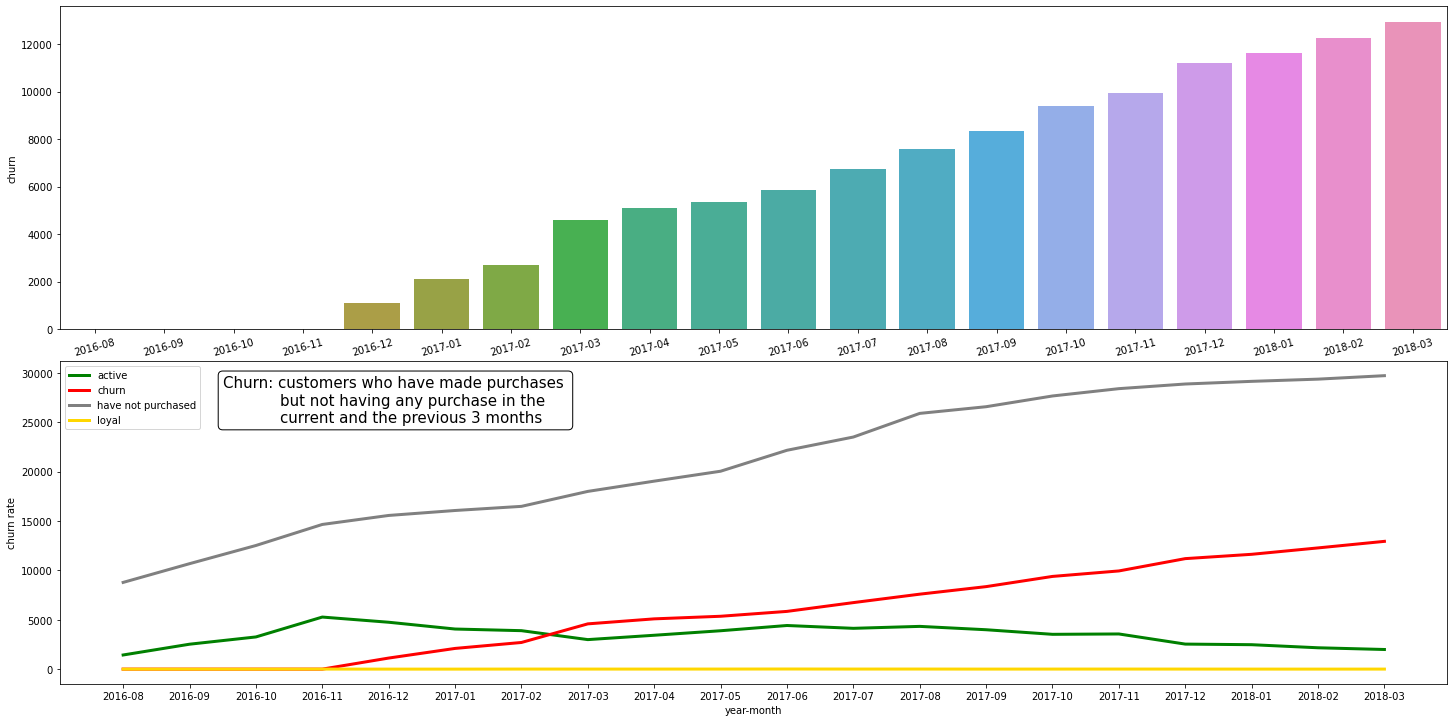

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
fig.tight_layout()
sns.barplot(churn['y_m'], churn['churn'], ax=ax1)
plt.text(x=1.5, 
         y=25000, 
         s='Churn: customers who have made purchases \n            but not having any purchase in the \n            current and the previous 3 months', 
         fontfamily='fantasy', 
         fontsize=15, 
         fontweight=5,
         bbox={'boxstyle':'round', 'facecolor':'none', 'edgecolor':'black'})
ax1.tick_params(axis='x', rotation=15)
plt.ylabel('churn rate')
plt.xlabel('year-month');

sns.lineplot(data=churn, x='y_m', y='active', ax=ax2, label='active', linewidth=3, color='green')
sns.lineplot(data=churn, x='y_m', y='churn', ax=ax2, label='churn', linewidth=3, color='red')
sns.lineplot(data=churn, x='y_m', y='have_not_purchased', ax=ax2, label='have not purchased', linewidth=3, color='grey')
sns.lineplot(data=churn, x='y_m', y='loyal', ax=ax2, label='loyal', linewidth=3, color='gold');

* Retention

In [42]:
customer_churn.head()

,customer_id,y_m,customer_created_at,num_order,prev_num_order,2nd_prev_num_order,3rd_prev_num_order,is_current_month_active,is_prev_month_active,is_2nd_prev_month_active,is_3rd_prev_month_active,total_num_order,status
0,8644299295,2016-08,2016-08-16,0,NaN,NaN,NaN,0,0,0,0,0,have_not_purchased
1,8644299295,2016-09,2016-08-16,0,0.0,NaN,NaN,0,0,0,0,0,have_not_purchased
2,8644299295,2016-10,2016-08-16,0,0.0,0.0,NaN,0,0,0,0,0,have_not_purchased
3,8644299295,2016-11,2016-08-16,0,0.0,0.0,0.0,0,0,0,0,0,have_not_purchased
4,8644299295,2016-12,2016-08-16,0,0.0,0.0,0.0,0,0,0,0,0,have_not_purchased


In [150]:
customer_churn['cohert'] = customer_churn['customer_created_at'].apply(lambda x: x[:7])
retention = pd.pivot_table(customer_churn.loc[lambda x: x['num_order'] != 0], # here we drop all the customers who didn't place order in certain months
                           index=['y_m'],
                           columns=['cohert'],
                           values=['customer_id'],
                           aggfunc=lambda x: x.nunique(),
                           fill_value=0).reset_index()
retention.columns = ['y_m'] + [col[1] for col in retention.columns[1:]]
retention

,y_m,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
0,2016-08,1433,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-09,470,744,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10,171,73,579,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-11,536,136,135,1546,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-12,114,34,22,70,508,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2017-01,95,32,24,78,49,210,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2017-02,162,63,49,96,39,30,320,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2017-03,184,45,28,65,25,20,21,863,0,...,0,0,0,0,0,0,0,0,0,0
8,2017-04,148,53,30,62,21,16,24,161,722,...,0,0,0,0,0,0,0,0,0,0
9,2017-05,179,39,23,83,20,17,24,64,52,...,0,0,0,0,0,0,0,0,0,0


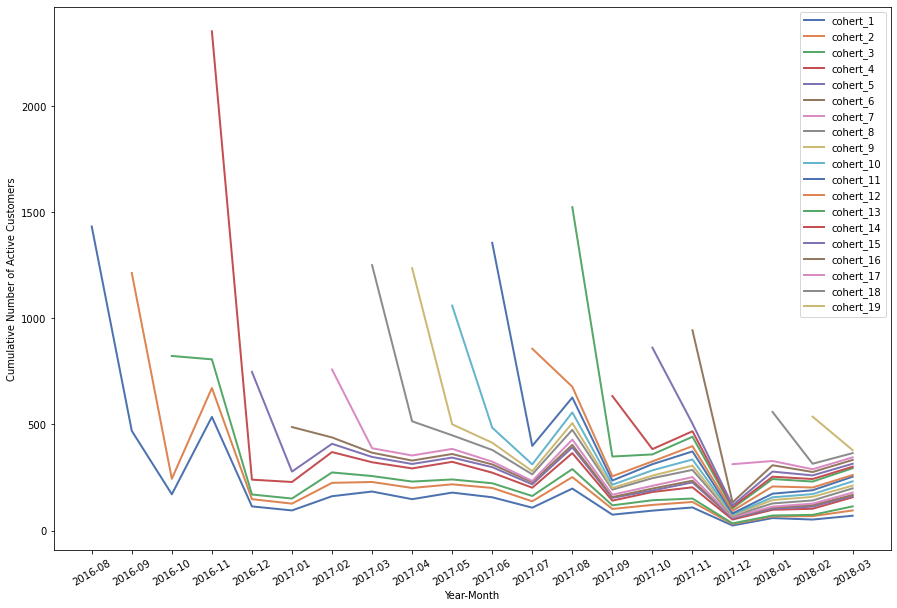

In [151]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.xticks(ticks=np.arange(len(retention['y_m'])), labels=retention['y_m'], rotation=30)
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Number of Active Customers')
for i in range(2, len(retention.columns)):
    data = retention.iloc[i-2:, 1:i]
    sns.lineplot(x=data.index, y=data.sum(axis=1), color=sns.color_palette("deep", n_colors=30)[i-2], label='cohert_' + str(i - 1), linewidth=2)

In [157]:
customer_retention = pd.DataFrame(retention['y_m'])
for i, col in enumerate(retention.columns[1:]):
    data = retention.loc[i:, col].reset_index(drop=True)
    customer_retention = pd.concat([customer_retention, data], axis=1)

for col in customer_retention.columns[1:]:
    if customer_retention[col].max() > 1:
        customer_retention[col] = np.round(customer_retention[col] / customer_retention[col].max(), 4)
customer_retention = customer_retention.drop(columns=['y_m'])
customer_retention

,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0
1,0.3280,0.0981,0.2332,0.0453,0.0965,0.1429,0.0656,0.1866,0.0720,0.1270,0.0999,0.1114,0.1099,0.0877,0.0753,0.0318,0.1111,0.1126,0.0631,NaN
2,0.1193,0.1828,0.0380,0.0505,0.0768,0.0952,0.0750,0.0742,0.0471,0.0572,0.0804,0.0437,0.0390,0.0912,0.0167,0.0682,0.0722,0.0866,NaN,NaN
3,0.3740,0.0457,0.0415,0.0621,0.0492,0.0762,0.0750,0.0637,0.0208,0.0894,0.0230,0.0284,0.0520,0.0211,0.0502,0.0364,0.0667,NaN,NaN,NaN
4,0.0796,0.0430,0.0846,0.0420,0.0413,0.0810,0.0406,0.0359,0.0443,0.0268,0.0333,0.0546,0.0142,0.0386,0.0356,0.0409,NaN,NaN,NaN,NaN
5,0.0663,0.0847,0.0484,0.0401,0.0394,0.0619,0.0188,0.0533,0.0111,0.0447,0.0436,0.0262,0.0414,0.0421,0.0293,NaN,NaN,NaN,NaN,NaN
6,0.1130,0.0605,0.0518,0.0537,0.0512,0.0476,0.0781,0.0278,0.0166,0.0519,0.0057,0.0742,0.0331,0.0246,NaN,NaN,NaN,NaN,NaN,NaN
7,0.1284,0.0712,0.0397,0.0323,0.0315,0.0571,0.0344,0.0417,0.0277,0.0072,0.0195,0.0284,0.0378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.1033,0.0524,0.0380,0.0252,0.0531,0.0190,0.0406,0.0394,0.0042,0.0233,0.0207,0.0175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.1249,0.0591,0.0432,0.0485,0.0256,0.0429,0.0531,0.0058,0.0222,0.0233,0.0253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


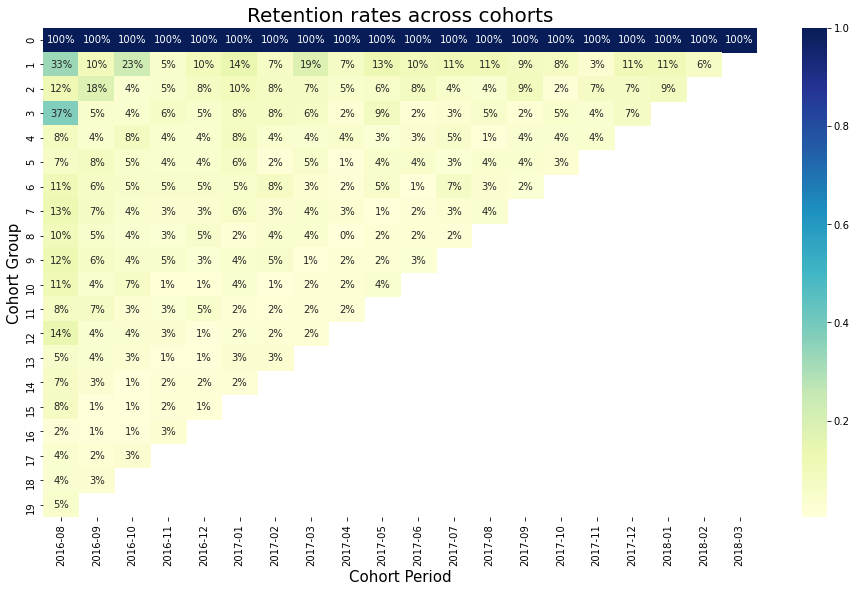

In [159]:
fig = plt.figure(figsize=(16,9))
fig.tight_layout()
ax = sns.heatmap(customer_retention, annot=True, cmap="YlGnBu", fmt='.0%')

ax.set_xlabel('Cohort Period', fontsize = 15)
ax.set_ylabel('Cohort Group', fontsize = 15)

ax.set_title('Retention Rates across Cohorts', fontsize = 20)
plt.show()